This notebook demos how to use Python and Julia in the same notebook using [SoS](https://vatlab.github.io/sos-docs) as the super kernel that communicates with the Python and Julia kernels, and exchange variables between them. Note that SoS is by itself based on Python 3 so it is good enough to have SoS and Julia for the features demonstrated in this notebook.

### Use of multiple kernels

Each cell of a SoS Notebook is associated with a kernel. You can select all available kernels from the language selection dropdown box at the top right corner of each code cell. Cells in different kernels are marked by different colors, as shown in the following screenshot:

![image.png](attachment:image.png)

Note that you may not see the language selection dropdown box and the colored prompts if you are viewing this notebook in a viewer that does not support the display of SoS cell kernel metadata.

The following two cells display versions of Julia and Python used in this notebook, using commands in their own kernels. A `%sessioninfo` magic as shown at the end of this notebook is, however, highly recommended for this particular purpose.

In [1]:
VERSION

v"0.6.3"

In [2]:
import sys
sys.version

'3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

### An example of data exchange between Julia and Python kernels

Let us start from the example of [this notebook](https://github.com/binder-examples/julia-python/blob/master/python-and-julia.ipynb), which allows calling Python functions from Julia in a very nice way. It is almost painstaking to achieve the same effect in SoS, but let us do it in the SoS way anyway:

We first create an array in Julia. Because SoS cannot yet handle the `StepRangeLen` type of Julia, let us create an `Array`

In [3]:
t = Array(linspace(0, 2*pi,1000));             # use the julia `linspace` and `pi`

We then transfer this `Array` to Python2 as a `numpy.array`,

In [4]:
%get t --from Julia
import numpy as np
s = 3*t + 4*np.cos(2*t)     # use the numpy cosine

Then back to Julia to apply `sin.`

In [5]:
%get s --from Python3
s = sin.(s)

1000-element Array{Float64,1}:
 -0.756802
 -0.768798
 -0.780133
 -0.790831
 -0.800913
 -0.810404
 -0.819324
 -0.827696
 -0.835542
 -0.842882
 -0.849738
 -0.856128
 -0.862072
  ⋮       
 -0.575016
 -0.595685
 -0.615473
 -0.634393
 -0.652464
 -0.669704
 -0.68613 
 -0.701765
 -0.716627
 -0.73074 
 -0.744124
 -0.756802

Then to Python3 to plot

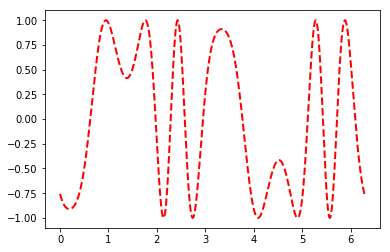

In [6]:
%get s --from Julia

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()                         # **** WATCH THIS VARIABLE ****
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--", label="sin(3t+4.cos(2t))")

The SoS way is less convenient but you are using two authentic Jupyter kernels with no additional syntax or library to learn, other than the `%get` magic to exchange variables between the two kernels. This notebook only shows the use of Python and Julia kernels but SoS allows data exchange among more than 10 languages so it is a much more general solution than language-specific modules.

### Transfer DataFrame between Julia, Python, and SoS

Just to demonstrate the transfer of dataframes between kernels, let us create a `DataFrame` in Julia

In [7]:
using DataFrames
df = DataFrame(A = 1:.02:10, B= sin.(1:.02:10))

,A,B
1,1.0,0.841471
2,1.02,0.852108
3,1.04,0.862404
4,1.06,0.872355
5,1.08,0.881958
6,1.1,0.891207
7,1.12,0.9001
8,1.14,0.908633
9,1.16,0.916803
10,1.18,0.924606


We can pass it to the SoS kernel where a `%preview` magic can be used to display the dataframe in a searchable and sortable table,

In [8]:
%preview -n df
%get df --from Julia

%preview df

>>> df:

,A,B
0,1.00,0.841471
1,1.02,0.852108
2,1.04,0.862404
3,1.06,0.872355
4,1.08,0.881958
5,1.10,0.891207
6,1.12,0.900100
7,1.14,0.908633
8,1.16,0.916803
9,1.18,0.924606


even generate a scatterplot with tooltips (move your cursor to the points to see):

In [9]:
%preview df -n -s scatterplot A B

%preview df

>>> df:

You can plot the dataframe in SoS using `matplotlib` (remember, SoS is based on Python3)

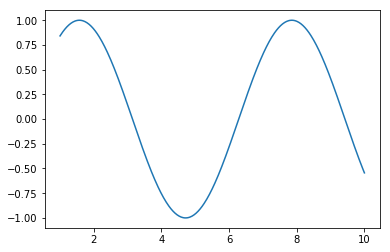

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['A'], df['B'])

Or transfer to the Python3 kernel if you wish:

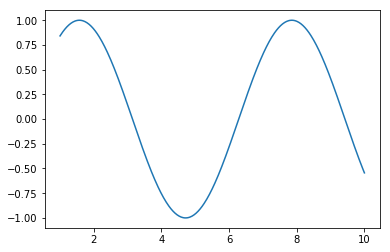

In [11]:
%get df
plt.plot(df['A'], df['B'])

### Session Info

As a good practice, all SoS Notebook should ends with a `%sessioninfo` magic to show the session information of all kernels used in the notebook, and/or a `%revisions` magic to show revisions of the notebook.

In [12]:
%sessioninfo

SoS Version,0.16.12
Kernel,julia-0.6
Language,Julia
Kernel,python3
Language,Python3
Version,"3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]"
numpy,1.15.0


In [13]:
%revisions

Revision,Author,Date,Message
8fdd03a,Chris Holdgraf,2018-10-09,adding SOS files
